In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', as_frame=False)

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [6]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [7]:
x,y= mnist.data , mnist.target

In [17]:
def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image , cmap='binary')
    plt.axis('off')

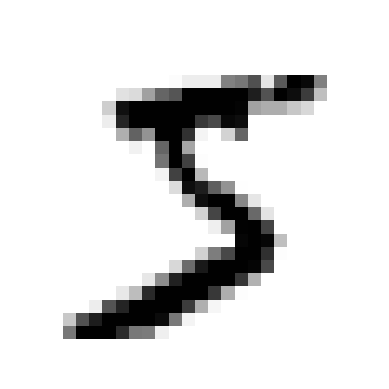

In [18]:
some_digit=x[0]
plot_digit(some_digit)

In [11]:
y[0]

'5'

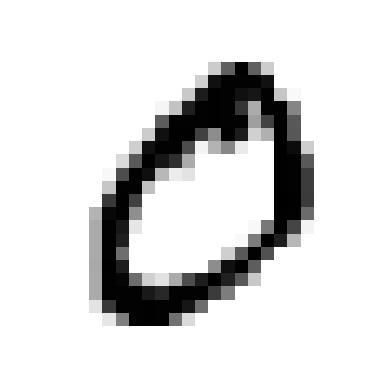

In [13]:
some_digit=x[1]
plot_digit(some_digit)

In [14]:
y[1]

'0'

In [19]:
# the training data is already shuffled in this dataset
# first 60000 are training data and rest are test data
x_train , x_test, y_train , y_test= x[:60000] , x[60000:], y[:60000] , y[60000:]

# Training a binary classifier

For now we will try to identify one digit
 1. for example the number 5
 2. so '5 Detector' will be an example of binary classifier
 3. it will distinguish only 5 and non 5


In [20]:
# create target vector for classification task
y_train_5=(y_train=='5')
y_test_5= (y_test=='5')


In [21]:
# we will use stochastic gradient descent (SDG)
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=22)
sgd.fit(x_train , y_train_5)

SGDClassifier(random_state=22)

In [24]:
sgd.predict([x[0]])

array([ True])

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd , x_train , y_train_5 , cv=3 , scoring='accurac')

array([0.9679, 0.964 , 0.9542])

In [26]:
# Create a dummy classifier that classifies every single image in the most frequent class
from sklearn.dummy import DummyClassifier
dummy= DummyClassifier()
dummy.fit(x_train , y_train_5)
print(any(dummy.predict(x_train)))

False


In [27]:
cross_val_score(dummy , x_train , y_train_5 , cv=3 , scoring='accuracy')


array([0.90965, 0.90965, 0.90965])

In [31]:
# cross validation predict
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(sgd , x_train , y_train_5 ,cv=3)

In [32]:
#Confusion matrix
# it counts the number of times instances of class A are classified as Class B , for all pairs of A/B
# example -> to know the number of times the classifier confused the image of 8 as 0 
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_train_5 , y_train_predict)
cf

array([[54149,   430],
       [ 1848,  3573]])

In [ ]:
# the first row of this matrix considers non 5 images (negative class)
# [[True negatives , False positives],
#    [False negatives , True positives]]
# 54149 -> correctly classified as non 5
# 430 -> wrongly classified as 5 
# 1848 -> wrongly classified as non 5 
# 3573 -> correctly classified as 5

In [33]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5 , y_train_predict)


0.8925805645765675

In [34]:
recall_score(y_train_5, y_train_predict)

0.659103486441616

In [35]:
# F1 score -> harmonic mean of precision and recall
from sklearn.metrics import f1_score
f1_score(y_train_5 , y_train_predict)


0.758276740237691

In [ ]:
# for each instance sgd classifier computes a score based on a decision function.
# if that score is greater than threshold , it assigns the instance to positive class 
# otherwise negative class


In [ ]:
# we can call decision function method which returns a score for each instance and then use any threshold you want to make predictions
# based on those scores

In [36]:
y_scores= sgd.decision_function([some_digit])
y_scores

array([3875.06838355])

In [38]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [53]:
# the sgd classifier uses a threshold equal to 0 so the code above shows the same result as predict
# lets change the threshold
threshold=4000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred
# thia will show false which means that rain=sing the threshold decreases recall

array([False])

# How to decide which threshold to use?

In [ ]:
#in an SGDClassifier (Stochastic Gradient Descent Classifier) from scikit-learn, the threshold typically refers 
# to the value used to convert the model's decision function output into a binary class label (i.e., 0 or 1).